<a href="https://colab.research.google.com/github/devjkcc/Automobile/blob/main/Modelos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [2]:
from google.colab import drive
drive.mount('/content/Meu_Drive')

Mounted at /content/Meu_Drive


In [3]:
df = pd.read_csv("/content/Meu_Drive/MyDrive/Colab Notebooks/automobileNew.csv", sep=',')

In [23]:
df

,Unnamed: 0,symboling,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,0,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,2,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,3,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,4,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,200,-1,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,9.5,114.0,5400.0,23,28,16845.0
201,201,-1,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,8.7,160.0,5300.0,19,25,19045.0
202,202,-1,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,8.8,134.0,5500.0,18,23,21485.0
203,203,-1,109.1,188.8,68.9,55.5,3217,145,3.01,3.40,23.0,106.0,4800.0,26,27,22470.0


In [5]:
X = df[['horsepower', 'engine-size', 'curb-weight', 'width', 'length']]
Y = df[['price']]


In [35]:
X_train, X_test ,Y_train, Y_test = train_test_split(X,Y, test_size=0.3, random_state=42)


In [36]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

reg = linear_model.LinearRegression()
reg.fit(X_train, Y_train)

LinearRegression()

In [37]:
y_pred = reg.predict(X_test)

In [38]:
y_pred = pd.DataFrame(y_pred)

In [39]:
y_pred

,0
0,25162.247003
1,17010.473607
2,11377.026603
3,13573.699858
4,24277.207521
...,...
57,7064.473801
58,21849.836788
59,6351.391024
60,10195.217676


In [40]:
from sklearn import metrics
print("R2: ", metrics.r2_score(Y_test, y_pred))
print("RMSE: ", metrics.mean_squared_error(Y_test, y_pred, squared=False))


R2:  0.7564796887691362
RMSE:  4088.2966750140386


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


<Axes: title={'center': 'Relação entre os valores testes e os valores de predição'}, xlabel='Valores teste', ylabel='Valores de predição'>

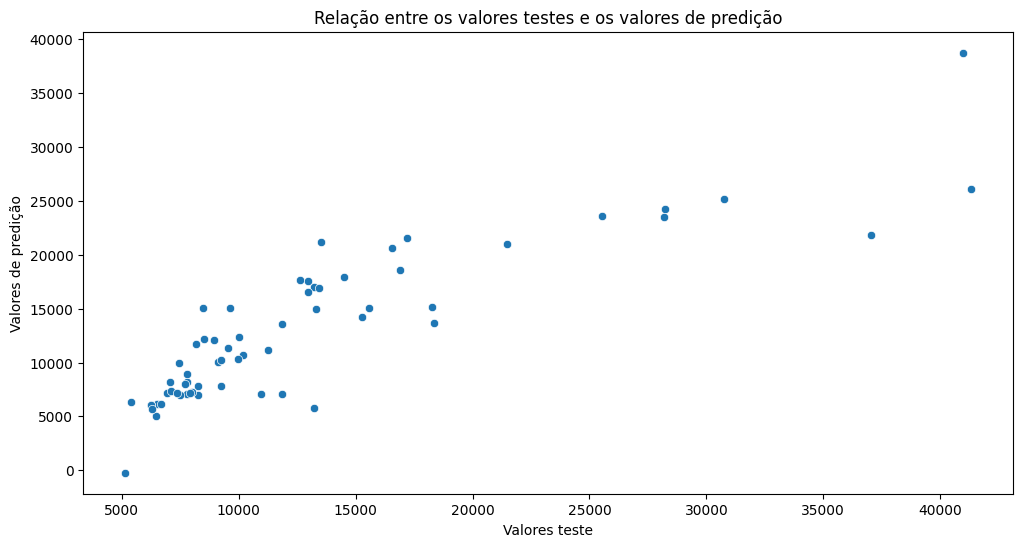

In [41]:
#Perceba que o gráfico segue uma linha de regressão linear
# A partir dos das métricas calculadas, vemos que o modelo explica 78% dos valores, o que é um otimo indicativo.
plt.figure(figsize=(12,6))
plt.title("Relação entre os valores testes e os valores de predição")
plt.xlabel("Valores teste")
plt.ylabel("Valores de predição")
sns.scatterplot(x=Y_test['price'].values.ravel(), y=y_pred.values.ravel())


In [51]:
# Testando um segundo modelo (RandomRegression)
# O R2 nos indica que esse modelo é muito mais assertivo que o outro(90%)


from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

model = RandomForestRegressor(n_estimators=50, random_state=42)

model.fit(X_train, Y_train)
y_model = model.predict(X_test)

y_model=pd.DataFrame(y_model)


print("R2: ", metrics.r2_score(Y_test, y_model))
print("RSME: ", metrics.mean_squared_error(Y_test, y_model))



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


R2:  0.8880575109070539
RSME:  7683243.13569969


(<Axes: title={'center': 'Relação entre os valores testes e os valores de predição'}, xlabel='Valores teste', ylabel='Valores de predição'>,)

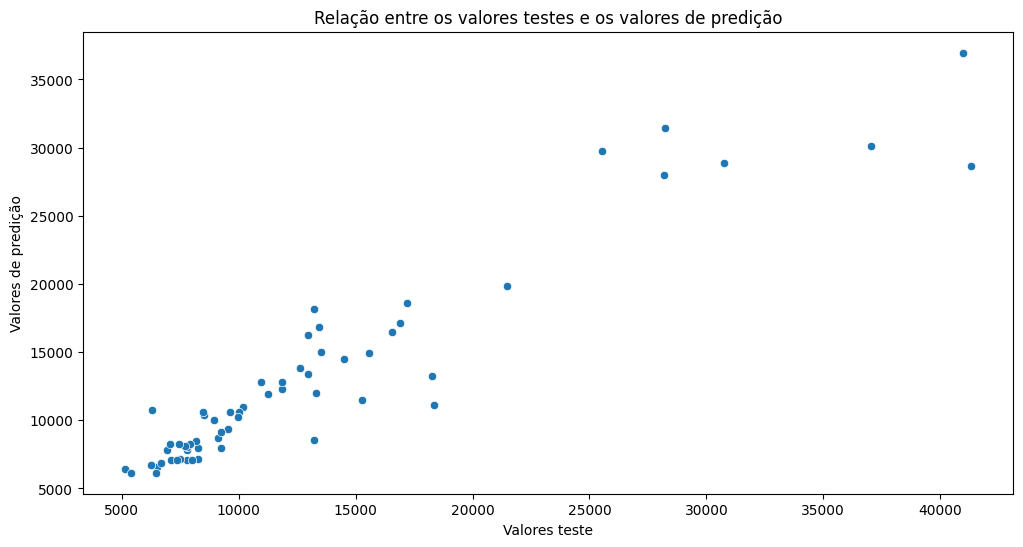

In [52]:
#Perceba que o gráfico segue uma linha de regressão linear
# A partir dos das métricas calculadas, vemos que o modelo explica 90% dos valores, o que é um otimo indicativo.
# Perceba que o gráfico a seguir apresenta uma linha mais linear, ou seja, boa parte dos valores se aproximam dos valores reais
plt.figure(figsize=(12,6))
plt.title("Relação entre os valores testes e os valores de predição")
plt.xlabel("Valores teste")
plt.ylabel("Valores de predição")
sns.scatterplot(x=Y_test['price'].values.ravel(), y=y_model.values.ravel()),

In [44]:
Y_test

,price
15,30760.000000
9,13207.129353
100,9549.000000
132,11850.000000
68,28248.000000
...,...
56,11845.000000
128,37028.000000
76,5389.000000
144,9233.000000


In [45]:
y_model

,0
0,28857.362587
1,18157.800000
2,9367.740000
3,12313.180000
4,31441.560000
...,...
57,12797.781667
58,30086.820000
59,6168.040000
60,9109.860000


In [46]:
y_test_reset = Y_test.reset_index(drop=True)
y_model_reset = y_model.reset_index(drop=True)

In [47]:
y_test_reset

,price
0,30760.000000
1,13207.129353
2,9549.000000
3,11850.000000
4,28248.000000
...,...
57,11845.000000
58,37028.000000
59,5389.000000
60,9233.000000


In [48]:
y_model_reset

,0
0,28857.362587
1,18157.800000
2,9367.740000
3,12313.180000
4,31441.560000
...,...
57,12797.781667
58,30086.820000
59,6168.040000
60,9109.860000


In [54]:
comparacao = pd.DataFrame({
    'Preço Original': y_test_reset['price'],
    "Preço calculado": y_model_reset[0]
})

In [56]:
# Percebemos que os valores originais e calculados são próximos, o que corresponde a uma eficiencia do modelo testado(RandomForest)
comparacao.head(20)


,Preço Original,Preço calculado
0,30760.000000,28857.362587
1,13207.129353,18157.800000
2,9549.000000,9367.740000
3,11850.000000,12313.180000
4,28248.000000,31441.560000
5,7799.000000,7107.320000
6,7788.000000,7848.520000
7,9258.000000,7975.200000
8,10198.000000,10949.260000
9,7775.000000,8077.940000
